# Import libraries for data processing and modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Importing Dataset

In [2]:
data=pd.read_csv('iris dataset.csv')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Dataset first look

In [3]:
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
data.shape

(150, 5)

# Data Pre-processing

In [5]:
# checking the null values
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Importing libraries used for encoding

In [8]:
from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype
le = LabelEncoder()

In [9]:
for i in data.columns:
    if is_numeric_dtype(data[i]):
      continue
    else:
      data[i]=le.fit_transform(data[i])
    
    

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


# Data Pre-processing

C:\Users\harsh\AppData\Local\Temp\ipykernel_18764\1837260565.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species',data=data,palette="Set2")


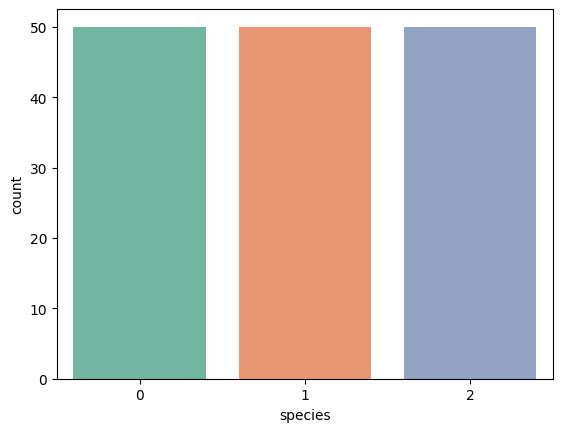

In [11]:
# create a bar chart to see the count of species category
sns.countplot(x='species',data=data,palette="Set2")
plt.show()

<Axes: xlabel='sepal_length', ylabel='Count'>

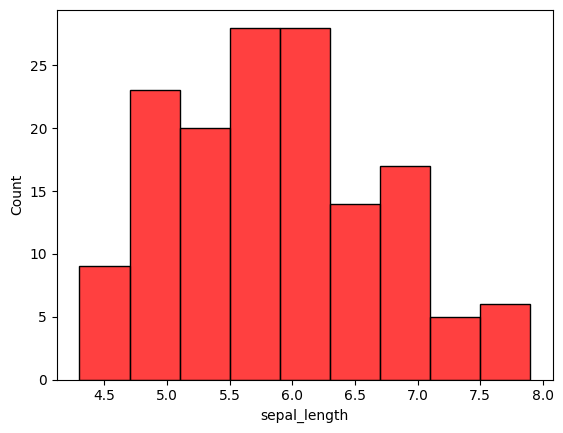

In [12]:
# Build a histogram of sepal_length data to know the relation
sns.histplot(data=data, x=data.sepal_length,color='Red')

<Axes: xlabel='sepal_length', ylabel='Count'>

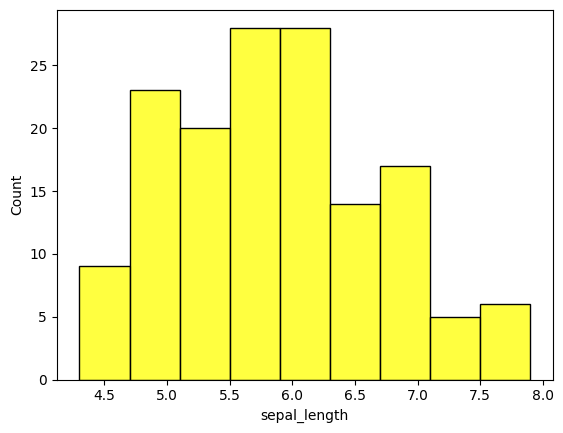

In [13]:
# Build a histogram of sepal_width data to know the relation
sns.histplot(data=data, x=data.sepal_length,color='yellow')


<Axes: xlabel='petal_length', ylabel='Count'>

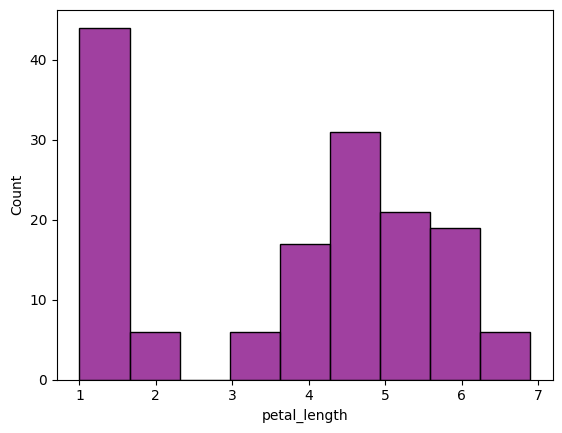

In [14]:
# Build a histogram for petal_length data to know the relation
sns.histplot(data=data, x=data.petal_length,color='purple')

<Axes: xlabel='petal_width', ylabel='Count'>

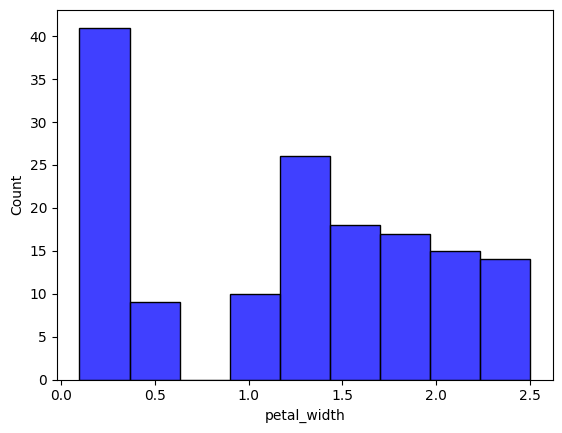

In [15]:
# Build a histogram for petal_width data to know the relation
sns.histplot(data=data, x=data.petal_width,color='blue')


<Axes: >

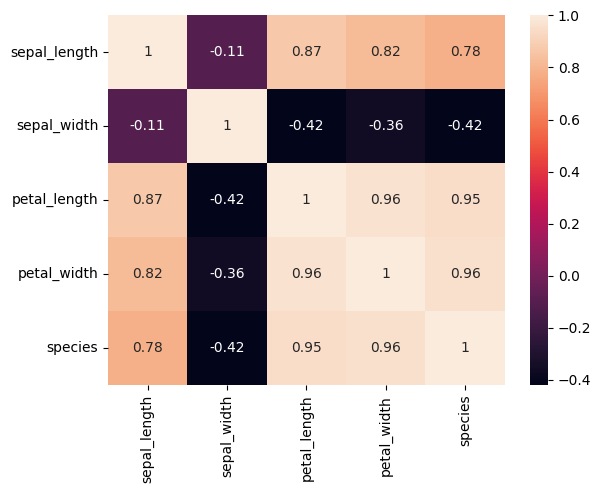

In [16]:
# Create a heatmap to see the feature-wise correlation in the dataset
corr=data.corr()
sns.heatmap(corr,annot=True)

# Data Preparation

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [19]:
# Assigning the predictor and target variable
x=data.drop(['species'],axis=1)
y=data.species


In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

# Model Building

In [21]:
# Importing essential libraries for model building
from sklearn.linear_model import LogisticRegression

In [22]:
# Building machine learning model and training them
Model=LogisticRegression()
Model.fit(x_train,y_train)

LogisticRegression()

In [23]:
# Evaluating the model to verify the accuracy
print("score for train data",Model.score(x_train,y_train))
print("score for test data",Model.score(x_test,y_test))
      

score for train data 0.9714285714285714
score for test data 0.9111111111111111


In [24]:
# Importing essential libraries for Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Building machine learning model and training them
Model2=RandomForestClassifier(n_estimators=300,random_state=100)
Model2.fit(x_train,y_train)


RandomForestClassifier(n_estimators=300, random_state=100)

In [25]:
# Evaluating the model to verify the accuracy
print("score for train data",Model2.score(x_train,y_train))
print("score for test data",Model2.score(x_test,y_test))

score for train data 1.0
score for test data 0.9111111111111111


In [26]:
# KNN K-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier

# Building machine learning model and training them
Model3=KNeighborsClassifier()
Model3.fit(x_train,y_train)

KNeighborsClassifier()

In [27]:
# Evaluating the model to verify the accuracy
print("score for train data",Model3.score(x_train,y_train))
print("score for test data",Model3.score(x_test,y_test))

score for train data 0.9714285714285714
score for test data 0.9555555555555556


# Model Testing

In [28]:
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [29]:
# For testing,we create a new dataframe with values close to the any of our existing data to evaluate
data={'sepal_length':[5.2],'sepal_width':[3.6],'petal_length':[1.4],'petal_width':[0.2]}
trail=pd.DataFrame(data)

In [30]:
result=Model.predict(trail)

In [31]:
print("Result species:",result[0])
      

Result species: 0
